**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
### init: assay folder and files
TXT_ASSAY     = "STARR_ATAC_K562_Reddy_KS91"
TXT_FNAME_INP = "region.coverage.summary.tsv"
TXT_FNAME_OUT = "region.coverage.score.atac.tsv"

**Check: files**

In [6]:
txt_region = VEC_TXT_REGION[1]
txt_fdiry  = file.path(
    FD_RES, "region_coverage_fcc_score",
    txt_region,
    TXT_ASSAY,
    "summary"
)
txt_fname = TXT_FNAME_INP
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/STARR_ATAC_K562_Reddy_KS91/summary/region.coverage.summary.tsv 


## Import ASTARR input

In [7]:
### loop through region sets and import table
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score",
        txt_region,
        TXT_ASSAY,
        "summary"
    )
    txt_fname = TXT_FNAME_INP
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150041     10

$fcc_astarr_macs_input_union
[1] 246852     10



Chrom,ChromStart,ChromEnd,Region,Input_DESeq,Input_FPKM,Input_TPM,Output_DESeq,Output_FPKM,Output_TPM
chr1,10038,10405,chr1:10038-10405,96.32888,0.0041644,3.940038,22.18751,0.0007357,0.7181993
chr1,14282,14614,chr1:14282-14614,62.86738,0.0030033,2.841707,61.74133,0.0022621,2.2104314
chr1,16025,16338,chr1:16025-16338,79.89682,0.0040487,3.830812,33.38053,0.0012867,1.2597204


## Arrange table

In [8]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    vec = dat$Input_TPM
    res = summary(vec)
    return(res)
})
print(lst)

$fcc_astarr_macs_input_overlap
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00192   2.74170   3.62856   6.66484   6.24239 473.26255 

$fcc_astarr_macs_input_union
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.012e-03 1.793e+00 2.215e+00 4.051e+00 3.397e+00 1.107e+02 



In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    ### set score column
    dat = dat %>% dplyr::mutate(
        Score       = Input_TPM,
        Score_Label = "ASTARR Input TPM"
    )

    ### break by quantiles
    vec_num_qs = quantile(dat$Score, probs = seq(0, 1, by = 0.25), na.rm = TRUE)
        
    dat$Score_Quantile = cut(
        dat$Score,
        breaks = vec_num_qs,
        include.lowest = TRUE,
        labels = c("Q1", "Q2", "Q3", "Q4")
    )
    # dat$Score_Label = "ASTARR Input TPM"

    ### calculate z score
    dat = dat %>%
        dplyr::mutate(
            Zcore       = as.vector(scale(log2(Score + 1))),
            Zcore_Label = "scale(log2(TPM + 1)"
        )
    
    ### assign assay information
    dat = dat %>%
        dplyr::mutate(
            Assay_Folder = "STARR_ATAC_K562_Reddy_KS91",
            Assay_Group = "ASTARR_KS91",
            Assay_Label = "ATAC"
        )
    
    ### arrange columns
    dat = dat %>%
        dplyr::select(
            Chrom, ChromStart, ChromEnd, Region, 
            Score, 
            Score_Label,
            Score_Quantile,
            Zcore,
            Zcore_Label,
            Assay_Folder,
            Assay_Group,
            Assay_Label
        ) %>%
        dplyr::arrange(Chrom, ChromStart, ChromEnd)
    return(dat)
})

### assign and show
lst_dat_region_score_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150041     12

$fcc_astarr_macs_input_union
[1] 246852     12



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Score_Quantile,Zcore,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,3.940038,ASTARR Input TPM,Q3,-0.2608700,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,ASTARR Input TPM,Q2,-0.6570534,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,ASTARR Input TPM,Q3,-0.2960970,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC


**Explore: Score distribution**

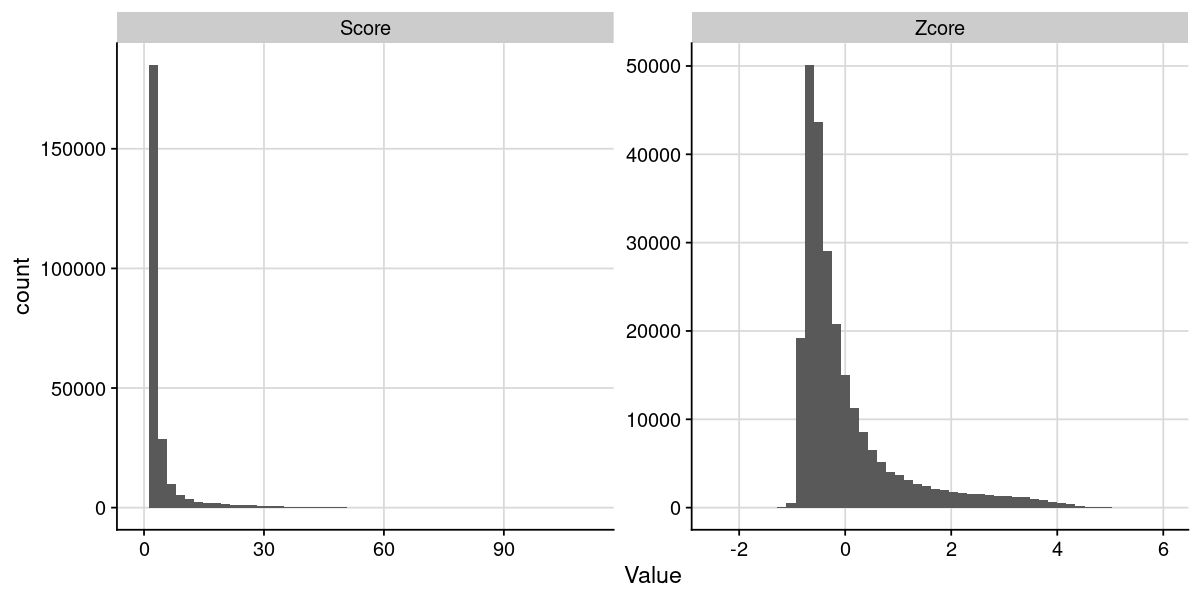

In [10]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_arrange
dat = lst[[idx]]

dat = dat %>% dplyr::select(Score, Zcore) %>% tidyr::gather(Metric, Value)
gpt = ggplot(dat, aes(x=Value)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Metric, scale = "free")

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Save results

In [11]:
for (txt_region in VEC_TXT_REGION){
    ### get table
    dat_region_score = lst_dat_region_score_arrange[[txt_region]]
    
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_region, 
        "summary"
    )
    dir.create(txt_fdiry, showWarnings = FALSE)
    #txt_cmd = paste("mkdir -p", txt_fdiry)
    #system(txt_cmd)

    ### wrte table
    txt_fname  = TXT_FNAME_OUT
    txt_fpath = file.path(txt_fdiry, txt_fname)
    dat = dat_region_score
    dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
    write_tsv(dat, txt_fpath)

    ### show progress
    cat("Save file", "\n")
    cat(txt_fdiry, "\n")
    cat(txt_fname, "\n")
    cat("\n")
}

Save file 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary 
region.coverage.score.atac.tsv 

Save file 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_union/summary 
region.coverage.score.atac.tsv 

